In [1]:
import pandas as pd

C:\ProgramData\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('pizza2.csv')

In [3]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [5]:
data.tail()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes
128,E,"Rp78,000",12 inch,meat,BBQ_meat_fiesta,medium,no,no,yes


In [6]:
data.shape

(129, 9)

In [7]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 129
Number of Columns 9


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [9]:
data.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [10]:
data.describe(include='all')

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,129,129,129,129,129,129,129,129,129
unique,5,43,12,12,20,6,2,2,2
top,C,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,30,11,49,29,30,41,76,86,72


# Data preprocessing

In [12]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [13]:
data.rename({'price_rupiah':'price'},axis=1,inplace=True)
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [14]:
data['price']=data['price'].str.replace("Rp","")
data['price']=data['price'].str.replace(",","").astype('int32')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price            129 non-null    int32 
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: int32(1), object(8)
memory usage: 8.7+ KB


In [17]:
def convert(value):
    return value*0.0054

In [18]:
data['price']=data['price'].apply(convert)

In [19]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [20]:
data['diameter'] = data['diameter'].str.replace("inch","")
data['diameter'] = data['diameter'].str.replace(" ","").astype('float32')


In [21]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


# Data Analysis

In [22]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [23]:
data['company'].value_counts()

company
C    30
E    30
A    25
B    24
D    20
Name: count, dtype: int64

In [24]:
import matplotlib.pyplot as plt

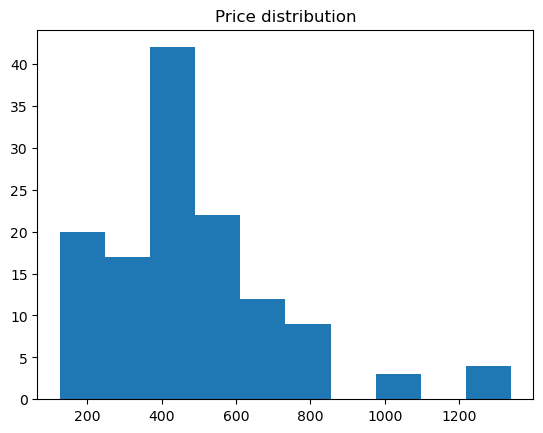

In [25]:
plt.hist(x="price",data=data)
plt.title("Price distribution")
plt.show()

In [26]:
data['diameter'].value_counts()

diameter
12.0    49
14.0    24
8.5     22
17.0    10
18.5     6
16.0     5
8.0      4
16.5     4
22.0     3
20.0     1
18.0     1
Name: count, dtype: int64

<Axes: xlabel='diameter', ylabel='count'>

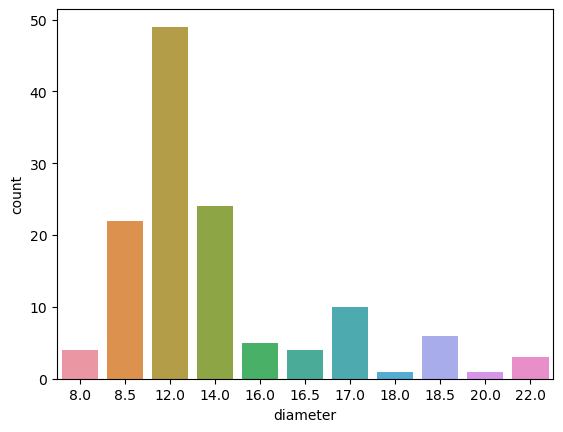

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data['diameter'])

In [28]:
data['topping'].value_counts()

topping
chicken         29
mushrooms       22
mozzarella      21
smoked_beef     19
tuna             9
vegetables       9
meat             8
black_papper     3
sausage          3
beef             3
papperoni        2
onion            1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='topping'>

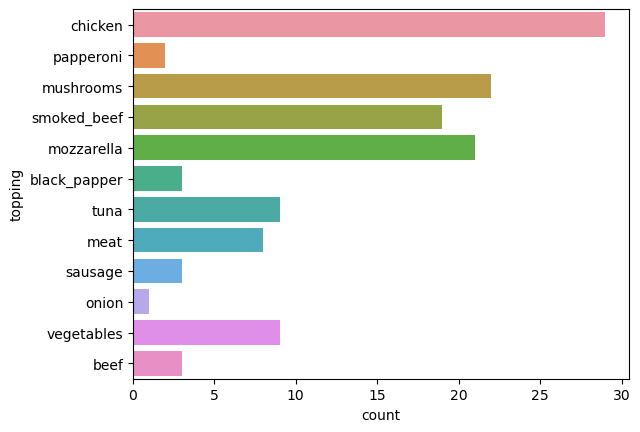

In [29]:
sns.countplot(y = data['topping'])

In [30]:
data['variant'].value_counts()

variant
classic              30
meat_lovers          10
double_mix           10
crunchy              10
new_york             10
double_decker         9
double_signature      5
american_favorite     5
BBQ_meat_fiesta       5
super_supreme         5
spicy_tuna            3
BBQ_sausage           3
extravaganza          3
meat_eater            3
gournet_greek         3
italian_veggie        3
thai_veggie           3
american_classic      3
neptune_tuna          3
spicy tuna            3
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='variant'>

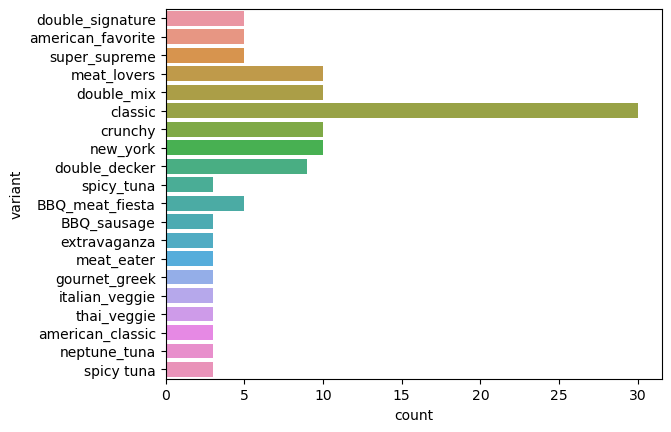

In [31]:
sns.countplot(y = data['variant'])

In [32]:
data['size'].value_counts()

size
medium     41
small      22
large      21
reguler    20
jumbo      15
XL         10
Name: count, dtype: int64

<Axes: xlabel='size', ylabel='count'>

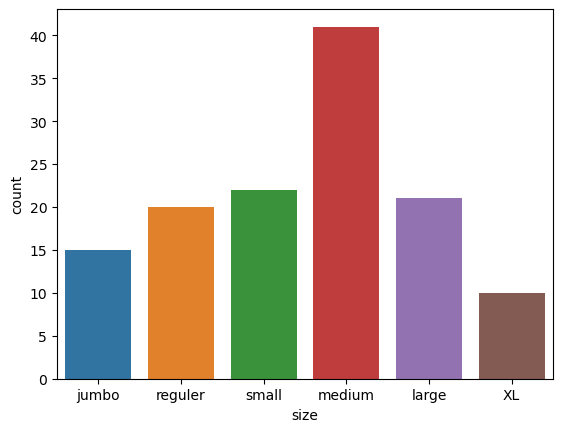

In [33]:
sns.countplot(x=data['size'])

In [34]:
data['extra_sauce'].value_counts()

extra_sauce
yes    76
no     53
Name: count, dtype: int64

<Axes: xlabel='extra_sauce', ylabel='count'>

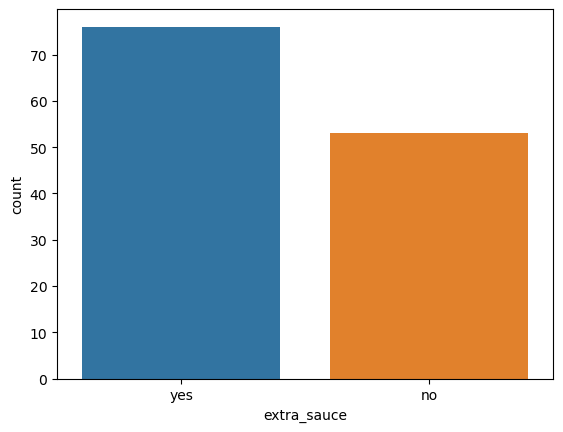

In [35]:
sns.countplot(x=data['extra_sauce'])

In [36]:
data['extra_cheese'].value_counts()

extra_cheese
yes    86
no     43
Name: count, dtype: int64

<Axes: xlabel='extra_cheese', ylabel='count'>

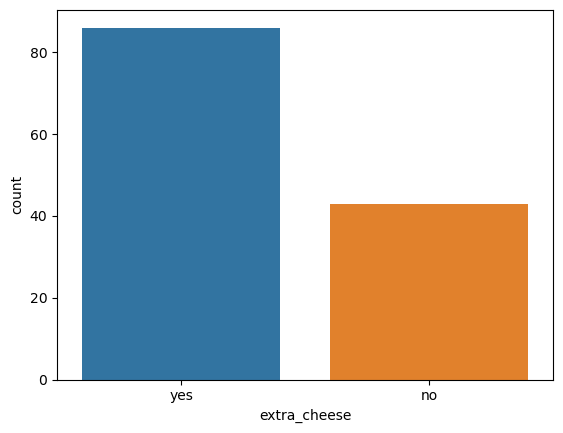

In [37]:
sns.countplot(x=data['extra_cheese'])

In [38]:
data['extra_mushrooms'].value_counts()

extra_mushrooms
yes    72
no     57
Name: count, dtype: int64

<Axes: xlabel='extra_mushrooms', ylabel='count'>

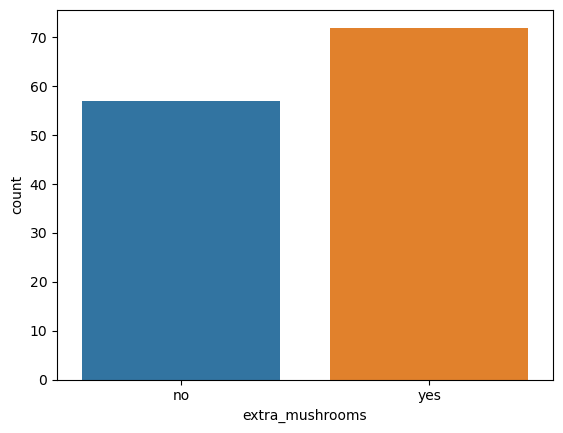

In [39]:
sns.countplot(x=data['extra_mushrooms'])

In [40]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

<Axes: xlabel='company', ylabel='price'>

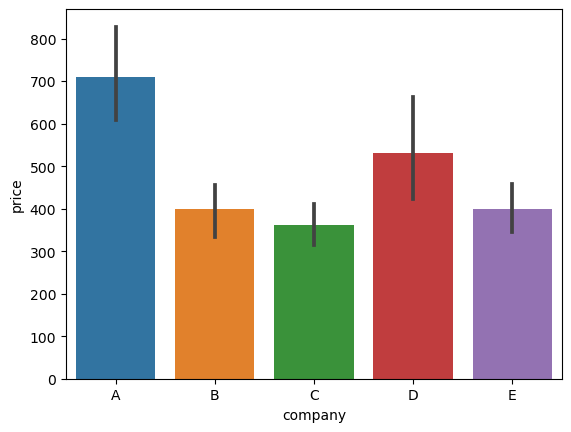

In [41]:
sns.barplot(x=data['company'],y=data['price'])

<Axes: xlabel='price', ylabel='topping'>

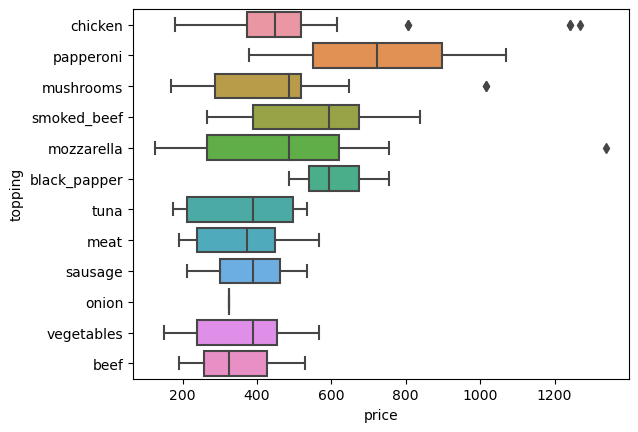

In [42]:
sns.boxplot(y='topping',x='price',data=data)

<Axes: xlabel='size', ylabel='price'>

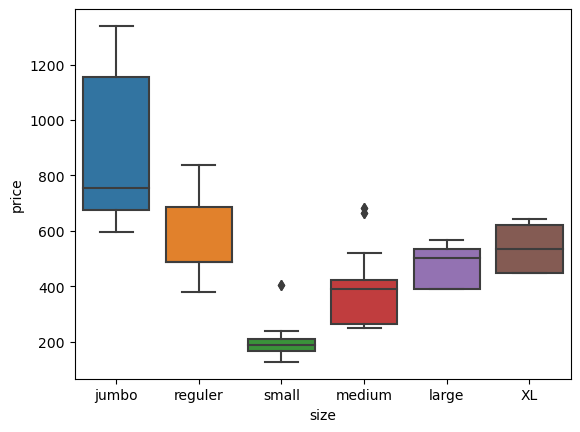

In [43]:
sns.boxplot(x='size',y='price',data=data)

In [44]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [45]:
data['price'].max()

1339.2

In [46]:
data[data['price'].max()==data['price']]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [47]:
data[data['size']=='jumbo']['diameter'].head()

0    22.0
1    20.0
4    18.0
5    18.5
6    16.0
Name: diameter, dtype: float32

In [48]:
data[data['size']=='XL']['diameter'].head()


29    17.0
35    17.0
41    17.0
47    17.0
93    17.0
Name: diameter, dtype: float32

In [49]:
data[(data['size']=='jumbo') & (data['diameter']<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,594.0,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,594.0,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


In [50]:
data = data.drop(data.index[[6,11,16,80]])

In [51]:
cat_cols=data.select_dtypes(include=['object']).columns

In [52]:
cat_cols

Index(['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese',
       'extra_mushrooms'],
      dtype='object')

In [53]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
en=LabelEncoder()
for i in cat_cols:
    data[i]=en.fit_transform(data[i])

In [56]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1269.0,22.0,2,8,1,1,1,0
1,0,1069.2,20.0,7,8,1,1,1,0
2,0,648.0,16.0,5,8,4,1,1,1
3,0,837.0,14.0,9,8,4,1,0,1
4,0,1339.2,18.0,4,8,1,1,0,1


In [57]:
X= data.drop('price',axis=1)
y = data['price']

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,
                                               random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression
from  sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [60]:
lr = LinearRegression()
lr.fit(X_train,y_train)

svm  = SVR()
svm.fit(X_train,y_train)

rf  = RandomForestRegressor()
rf.fit(X_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [61]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gbr.predict(X_test)
y_pred5 = xg.predict(X_test)

In [62]:
from sklearn import metrics

In [63]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
score5 = metrics.r2_score(y_test,y_pred5)

In [64]:
print(score1,score2,score3,score4,score5)

0.6712827779795159 -0.058422678416528706 0.8290511526796058 0.8865575601284047 0.8029020264469139


In [65]:
final_data = pd.DataFrame({'Models':['LR','SVR','RF','GB','XGR'],
             'R2_SCORE':[score1,score2,score3,score4,score5]})

In [66]:
final_data

,Models,R2_SCORE
0,LR,0.671283
1,SVR,-0.058423
2,RF,0.829051
3,GB,0.886558
4,XGR,0.802902


<Axes: xlabel='Models', ylabel='R2_SCORE'>

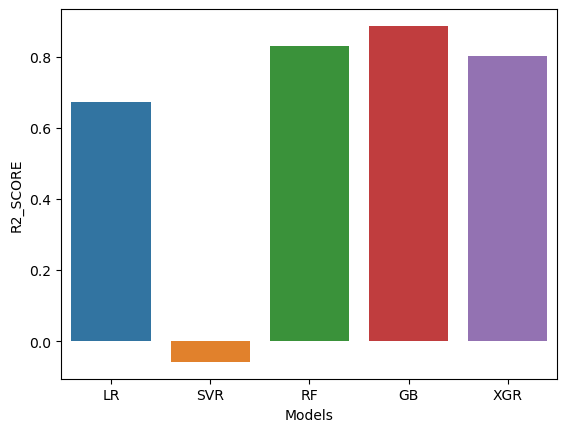

In [67]:
sns.barplot(x=final_data['Models'],y=final_data['R2_SCORE'])

In [68]:
rf.feature_importances_

array([0.02634781, 0.60161526, 0.0345588 , 0.12709028, 0.17048785,
       0.02132509, 0.01383299, 0.0047419 ])

<Axes: >

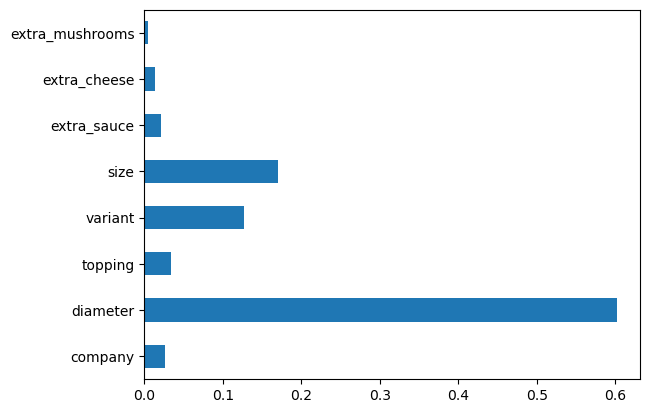

In [69]:
fea = pd.Series(rf.feature_importances_,index=X_train.columns)
fea.plot(kind='barh')

In [70]:
xg.feature_importances_

array([0.0080106 , 0.39336628, 0.01220485, 0.07297975, 0.44671908,
       0.05231223, 0.0084051 , 0.00600212], dtype=float32)

<Axes: >

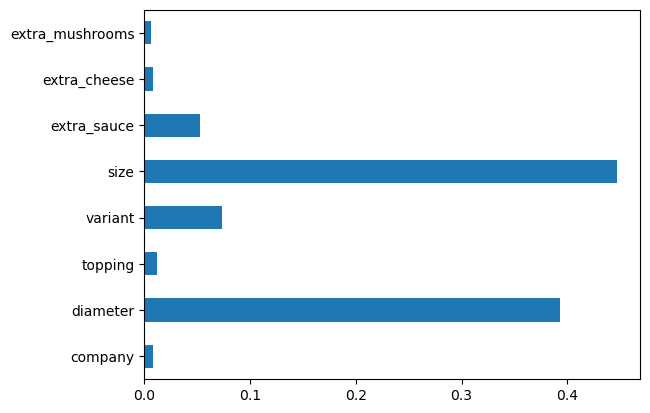

In [72]:
fea = pd.Series(xg.feature_importances_,index=X_train.columns)
fea.plot(kind='barh')

In [73]:
X = data.drop('price',axis=1)
y = data['price']

In [74]:
xgb=XGBRegressor()

In [75]:
xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [76]:
import joblib

In [77]:
joblib.dump(xgb,'pizza_price_predict')

['pizza_price_predict']

In [78]:
model = joblib.load('pizza_price_predict')

In [79]:
import pandas as pd
df = pd.DataFrame({
    'company':1,
    'diameter':22.0,
    'topping':2,
    'variant':8,
    'size':1,
    'extra_sauce':1,
    'extra_cheese':1,
    'extra_mushrooms':1
},index=[0])

In [80]:
df

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,1,22.0,2,8,1,1,1,1


In [81]:
model.predict(df)

array([1262.8436], dtype=float32)

In [82]:
data['extra_cheese'].unique()

array([1, 0])